In [1]:
#ST1D: obtenção da função de transferência
#modelo com massa rigida mp acoplado a plataforma

from sympy import symbols
ksv, tsv, s = symbols('ksv tsv s')
expr1 = ksv/(1+tsv*s)
#expr1

kq, kc, xsv, pl = symbols('kq kc xsv pl')
expr2=kq*xsv-kc*pl
#expr2

cl, A, kh = symbols('cl A kh')
expr3=1/(cl+A*A/kh*s)
#expr3

expr4=A

expr5=A*s

msp, csp, ksp=symbols('msp csp ksp')
Hsp=-msp*s*s/(msp*s*s+csp*s+ksp)
#Hsp

#mp=symbols('mp')
#mt=mp+msp*(1+Hsp)
#mt

mtm, ctm, ktm=symbols('mtm ctm ktm')
expr6=1/(mtm*s*s+ctm*s+ktm)
#expr6


expr7=msp*s*s

isv=symbols('isv')
Ql=expr2.subs(xsv,expr1*isv)
#Ql

from sympy import *
xp, isv=symbols('xp isv')
expr_pl_1=pl-(Ql-expr5*xp)*expr3
expr_pl_2=solveset(expr_pl_1,pl)
expr_pl=expr_pl_2.args[0]            #para converter FiniteSet em sym, i.e. tirar os parenteses {}

#expr_pl
#expand(expr_pl)
#factor(expr_pl)

expr_fs=A*expr_pl
#expr_fs


#expr8=1/(csp*s+ksp)
#expr8

#expr_Hsp=-expr7*(expr8/(1+expr7*expr8))
#expr_Hsp

expr_xp_1=xp-expr6*expr_fs
expr_xp_2=solveset(expr_xp_1,xp)
expr_xp_3=expr_xp_2.args[0] 
#expr_xp_3

ksvkq=symbols('ksvkq')
expr_xp_4=expr_xp_3.subs(kq*ksv,ksvkq) 
#expr_xp_4

expr_xp_5=expr_xp_4.subs(isv,1) 
#expr_xp_5

#print(simplify(expr_xp_5))

#fs/isv
expr_fs=simplify(expr_xp_5*(mtm*s*s+ctm*s+ktm))
#expr_fs

In [2]:
expr_fs

A*kh*ksvkq*(ctm*s + ktm + mtm*s**2)/((s*tsv + 1)*(A**2*ctm*s**2 + A**2*kh*s + A**2*ktm*s + A**2*mtm*s**3 + cl*ctm*kh*s + cl*kh*ktm + cl*kh*mtm*s**2 + ctm*kc*kh*s + kc*kh*ktm + kc*kh*mtm*s**2))

In [ ]:
#FT anel fechado com Cont proporcional
kp=symbols('kp')
expr_cl=kp*expr_xp_5/(1+kp*expr_xp_5)
simplify(expr_cl)

In [ ]:
print(simplify(expr_cl))

4 states have been removed from the model


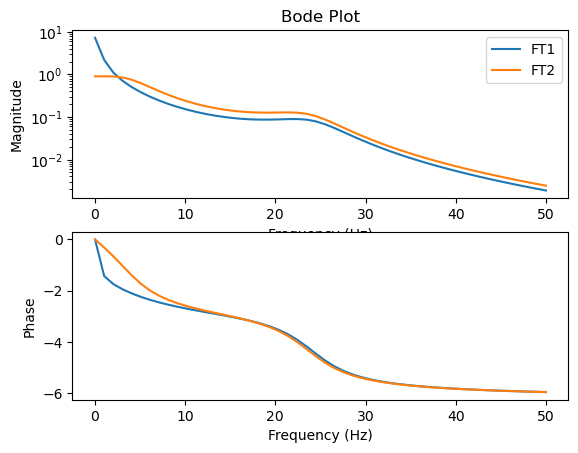

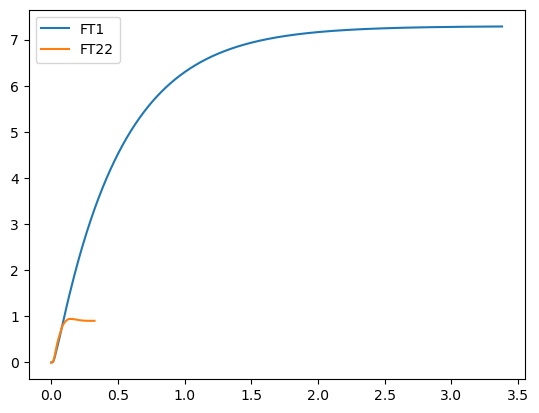

In [6]:
#FT do anel fechado
#modelo com massa rigida mp acoplado a plataforma

import os
import matplotlib.pyplot as plt   # MATLAB plotting functions
import control as ct
from control.matlab import *  # MATLAB-like functions
import math


#Servo-valve parameters
tsv=0.0246      #Valve time constant (tsv=0.0246 s)
ksvkq=1934.5    #Valve flow gain (ksvkq=1934.5 cm3/s/V)
kpl=1.67401e-7  #Valve pressure gain & leakadge factor (kpl=1.67401e-7 m3/s/kPa)
Be=193716.28    #Oil Bulk modulus (Be=193716.28 kPa)
Vt=0.002659     #Oil Volume on actuator chamber (Vt=0.002659 m3)
A=0.012456      #Piston area (A=0.012456 m2)




kh=4*Be*A**2/Vt #(kPa m)

#1DOF model
mtm=2            #Rigid mass (t)


fn1dof=5                          #Natural frequency (Hz)
zeta1dof=0.02                     #damping ratio (2%)
wn1dof=2*math.pi*fn1dof           #Natural frequency (rad/s)
cct=2*mtm*wn1dof                  #critical damping
ctm=zeta1dof*cct                  #damping
ktm=wn1dof**2*mtm               #stiffness
#ctm=5.78        #damping, actuator + platen (ct=5.78 kN s/m)

#Controller
kp=1.2993       #Pgain (kp=1.2993 V/cm)


s=tf('s')

#FT do anel aberto Gaa=xp/isv
#Gaa=A*kh*ksvkq/((s*tsv + 1)*(A**2*ctm*s**2 + A**2*kh*s + A**2*ktm*s + A**2*mtm*s**3 + cl*ctm*kh*s + cl*kh*ktm + cl*kh*mtm*s**2 + ctm*kc*kh*s + kc*kh*ktm + kc*kh*mtm*s**2))
Gaa=10**-4*A*kh*ksvkq/((s*tsv + 1)*(A**2*ctm*s**2 + A**2*kh*s + A**2*ktm*s + A**2*mtm*s**3 + kpl*ctm*kh*s + kpl*kh*ktm + kpl*kh*mtm*s**2 ))

#Gfs=fs/isv=Gaa*(mtm*s*s+ctm*s)
#Gfs=minreal(Gaa*(mtm*s*s+ctm*s))

#Gfs2=

#ktm=ktm*100;
#Gaa2=10**-4*A*kh*ksvkq/((s*tsv + 1)*(A**2*ctm*s**2 + A**2*kh*s + A**2*ktm*s + A**2*mtm*s**3 + kpl*ctm*kh*s + kpl*kh*ktm + kpl*kh*mtm*s**2 ))



#FT do anel fechado
Gxraf=Gaa*kp/(1+Gaa*kp)
Gxraf2=minreal(Gxraf)     #reducao do modelo


#Visualização
FT1=Gaa
FT2=Gxraf2

# Bode plot for the system
plt.figure(1)
plt.subplot(2, 1, 1)
mag, phase, om = bode(FT1, linspace(0.01, 50*6.28), dB=False, plot=False)
mag2, phase2, om2 = bode(FT2, linspace(0.01, 50*6.28), dB=False, plot=False)
#mag, phase, om = bode(Gxr, logspace(-2, 2), plot=True)
#mag, phase, om = bode(Gxr, Hz=True, dB=False, plot=True)
plt.semilogy(om/6.28, mag, om2/6.28, mag2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude") 
plt.title("Bode Plot")
plt.gca().legend(('FT1','FT2'))
plt.subplot(2, 1, 2)
plt.plot(om/6.28, phase,om2/6.28, phase2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")

# Step response for the system
plt.figure(2)
yout, T = step(FT1)
yout2, T2 = step(FT2)
plt.plot(T.T, yout.T,T2.T, yout2.T)
plt.gca().legend(('FT1','FT22'))
plt.show(block=False)

#S_Gxr = ct.step_info(Gxraf)
#for k in S_Gxr:
#    print(f"{k}: {S_Gxr[k]}")


#import numpy as np
#Gxr2.den/Gxr2.den[0][0][4]
#Gxr.den/Gxr.den[0][0][4]

In [26]:
#Ft do Anel Aberto Gaa=xp/isv
Gaa

TransferFunction(array([108.9462553]), array([7.63347525e-06, 6.92277903e-04, 1.96096100e-01, 7.70771689e+00,
       1.49400745e+01]))

array([[list([<matplotlib.lines.Line2D object at 0x00000219FB6539D0>]),
        list([])]], dtype=object)

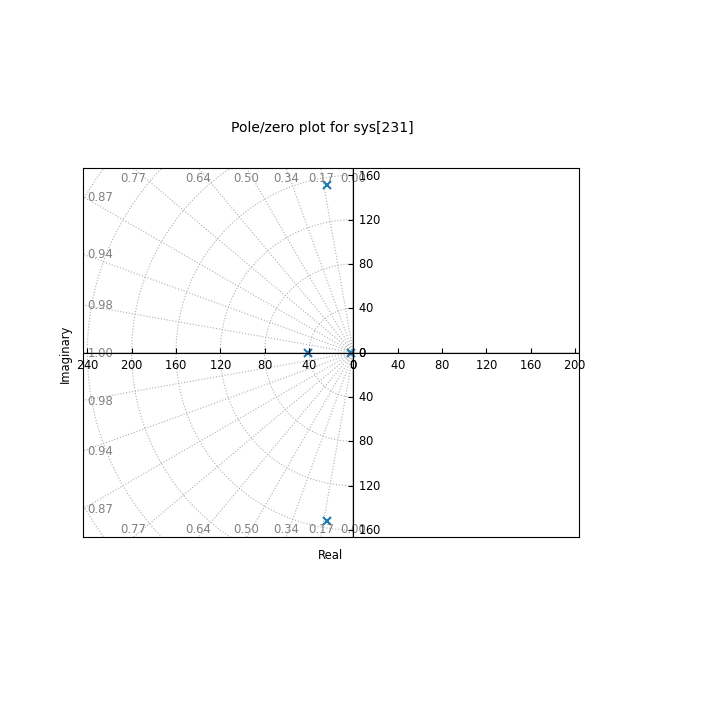

In [30]:
ct.pzmap(Gaa, plot='true',grid='true')

In [2]:
damp(Gaa)

    Eigenvalue (pole)       Damping     Frequency
       -24    +151.6j        0.1564         153.5
       -24    -151.6j        0.1564         153.5
               -40.65             1         40.65
               -2.044             1         2.044


(array([153.48209215, 153.48209215,  40.6504065 ,   2.04385531]),
 array([0.15635531, 0.15635531, 1.        , 1.        ]),
 array([-23.99774025+151.59439658j, -23.99774025-151.59439658j,
        -40.6504065   +0.j        ,  -2.04385531  +0.j        ]))

In [31]:
zeros(Gaa)

array([], dtype=complex128)

In [23]:
#FT do anel fechado  Gxarf2=xp/xp_ref
Gxraf2

TransferFunction(array([18543830.28132787]), array([1.00000000e+00, 9.06897423e+01, 2.56889678e+04, 1.00972580e+06,
       2.05010089e+07]))

array([[list([<matplotlib.lines.Line2D object at 0x00000219FB652ED0>]),
        list([])]], dtype=object)

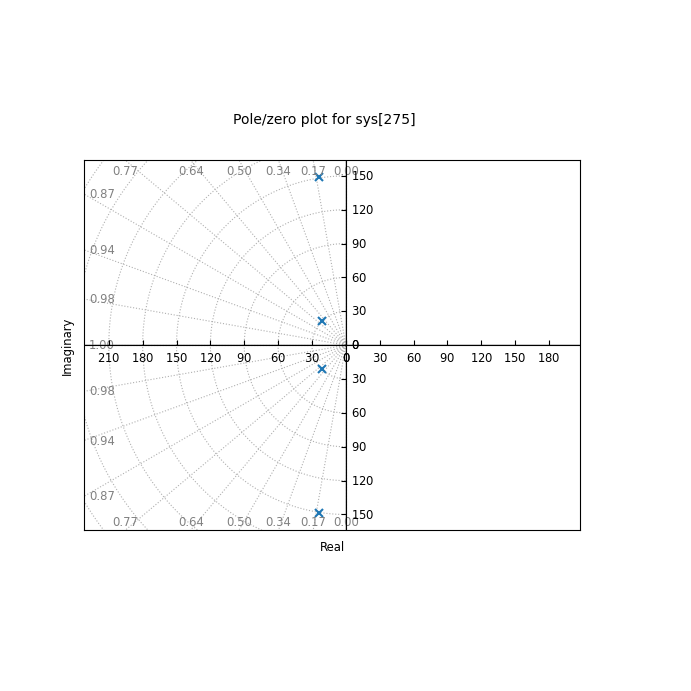

In [28]:
ct.pzmap(Gxraf2, plot='true',grid='true')

In [29]:
damp(Gxraf2)

    Eigenvalue (pole)       Damping     Frequency
     -24.1    +148.9j        0.1598         150.8
     -24.1    -148.9j        0.1598         150.8
    -21.25    +21.22j        0.7076         30.03
    -21.25    -21.22j        0.7076         30.03


(array([150.79581235, 150.79581235,  30.02605915,  30.02605915]),
 array([0.15980659, 0.15980659, 0.70760887, 0.70760887]),
 array([-24.09816528+148.85783639j, -24.09816528-148.85783639j,
        -21.24670587 +21.21654349j, -21.24670587 -21.21654349j]))

In [32]:
zeros(Gxraf2)

array([], dtype=complex128)

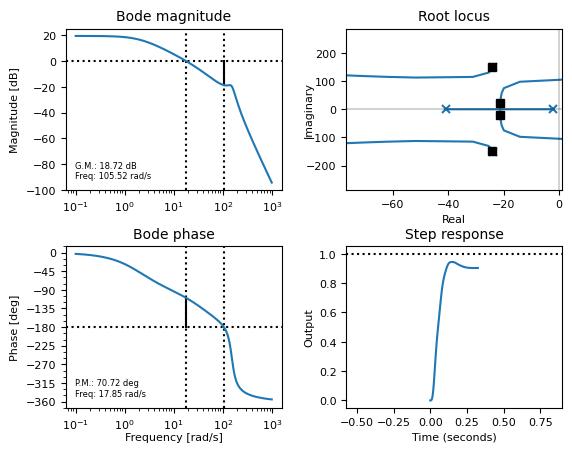

In [7]:
ct.sisotool(Gaa, initial_gain=1.2993)

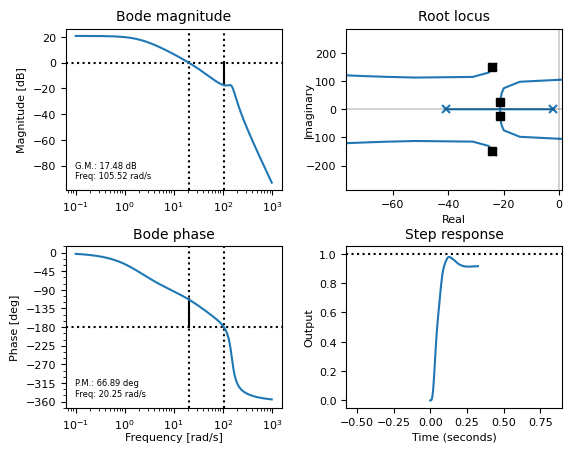

In [9]:
ct.sisotool(Gaa, initial_gain=1.5)

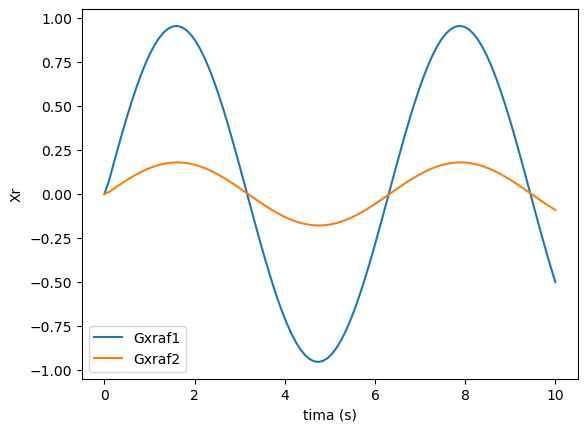

In [46]:
#resposta sinusoidal

import numpy as np # numerical library

#controlador
kpc=3
Gxraf1=Gaa*kpc/(1+Gaa*kpc)
Gxraf2=Gaa2*kpc/(1+Gaa2*kpc)

timepts = np.linspace(0, 10, 100)
Usin = np.sin(timepts)
tsin1, ysin1 = ct.forced_response(Gxraf1, timepts, Usin)
tsin2, ysin2 = ct.forced_response(Gxraf2, timepts, Usin)

plt.figure(3)
plt.plot(tsin1, ysin1,tsin2, ysin2)
plt.xlabel("tima (s)")
plt.ylabel("Xr")
plt.gca().legend(('Gxraf1','Gxraf2'))

StateSpace(array([[-9.06897423e+01,  1.23398051e+02,  9.74815255e+01,
        -2.17126116e+01, -2.00000000e-01,  0.00000000e+00],
       [-1.00000000e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.42721698e+01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.42721698e+03,  0.00000000e+00, -1.00000000e+02]]), array([[-0.15],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 1.  ],
       [ 0.  ]]), array([[  0.        ,   0.        ,   0.        , -14.27216985,
          0.        ,   0.        ]]), array([[0.]]))

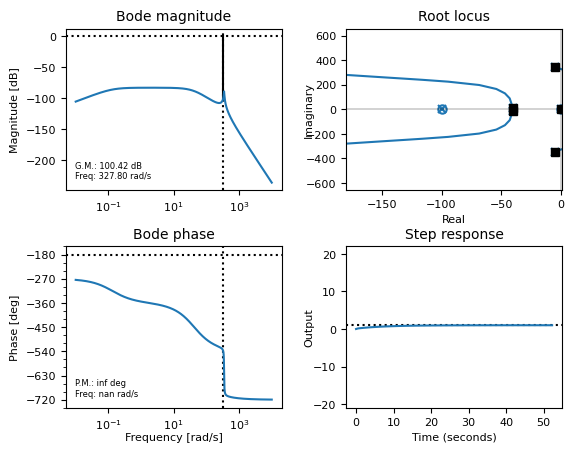

In [43]:
ct.rootlocus_pid_designer(Gaa2,gain='P', sign=1, input_signal='r', Kp0=1.5, Ki0=2, Kd0=0,)

array([[list([<matplotlib.lines.Line2D object at 0x0000029FF6C901D0>]),
        list([]),
        list([<matplotlib.lines.Line2D object at 0x0000029FF7367610>, <matplotlib.lines.Line2D object at 0x0000029FF7367D10>, <matplotlib.lines.Line2D object at 0x0000029FF7368610>, <matplotlib.lines.Line2D object at 0x0000029FF7368E90>])]],
      dtype=object)

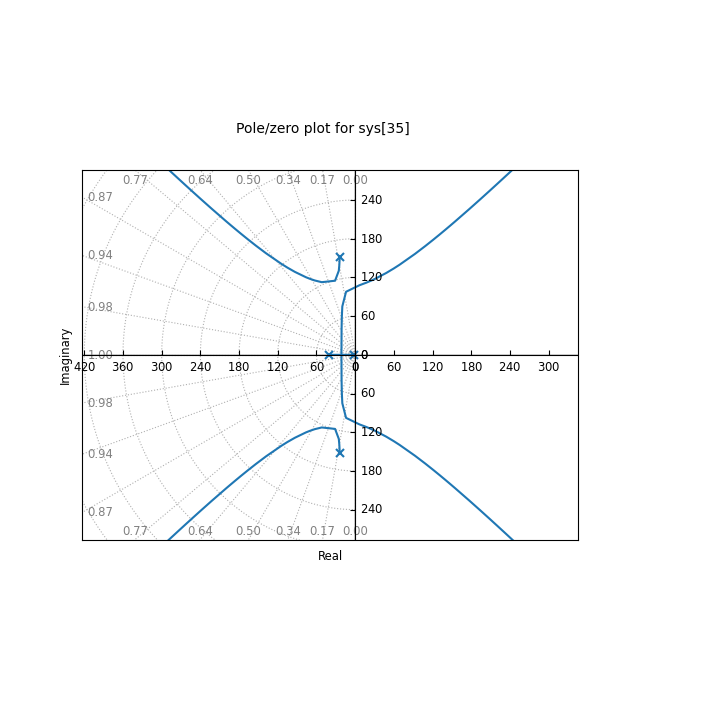

In [27]:
ct.root_locus(Gaa)

array([[list([<matplotlib.lines.Line2D object at 0x0000029FF2D9C8D0>]),
        list([]),
        list([<matplotlib.lines.Line2D object at 0x0000029FF2E20BD0>, <matplotlib.lines.Line2D object at 0x0000029FF2E20F90>, <matplotlib.lines.Line2D object at 0x0000029FF2D66C90>, <matplotlib.lines.Line2D object at 0x0000029FF2D67B10>])]],
      dtype=object)

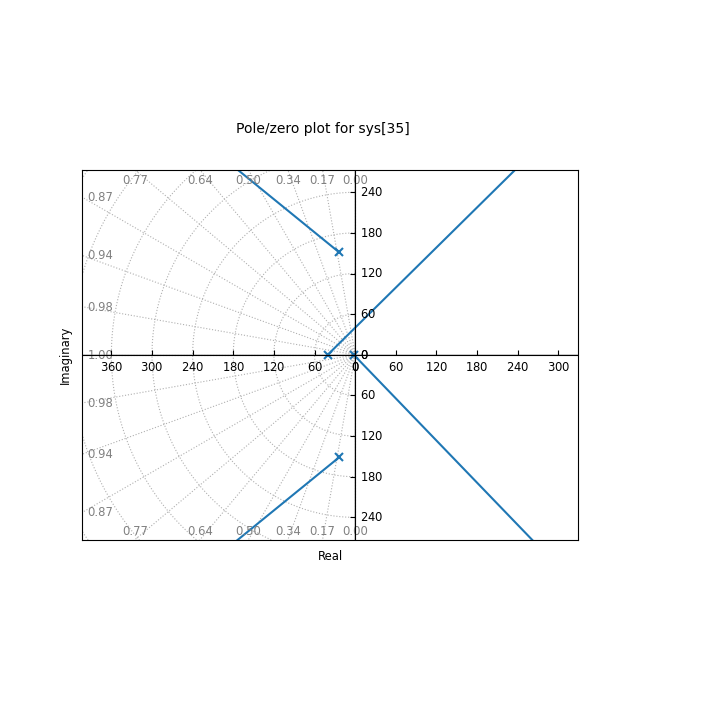

In [32]:
import numpy as np
ct.root_locus(Gaa,[0,10**5])

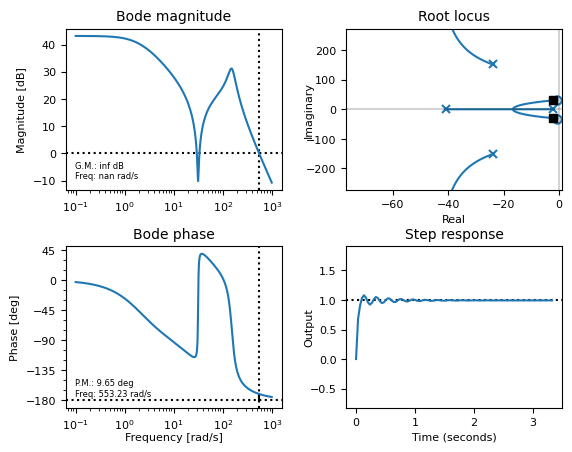

In [18]:
ct.sisotool(Gfs, initial_gain=0.01)

array([[list([<matplotlib.lines.Line2D object at 0x000002A2D0BE5390>]),
        list([<matplotlib.lines.Line2D object at 0x000002A2D0BECED0>]),
        list([<matplotlib.lines.Line2D object at 0x000002A2D0BAEF50>, <matplotlib.lines.Line2D object at 0x000002A2D0C7D590>, <matplotlib.lines.Line2D object at 0x000002A2D0C7DDD0>, <matplotlib.lines.Line2D object at 0x000002A2D0C7E6D0>])]],
      dtype=object)

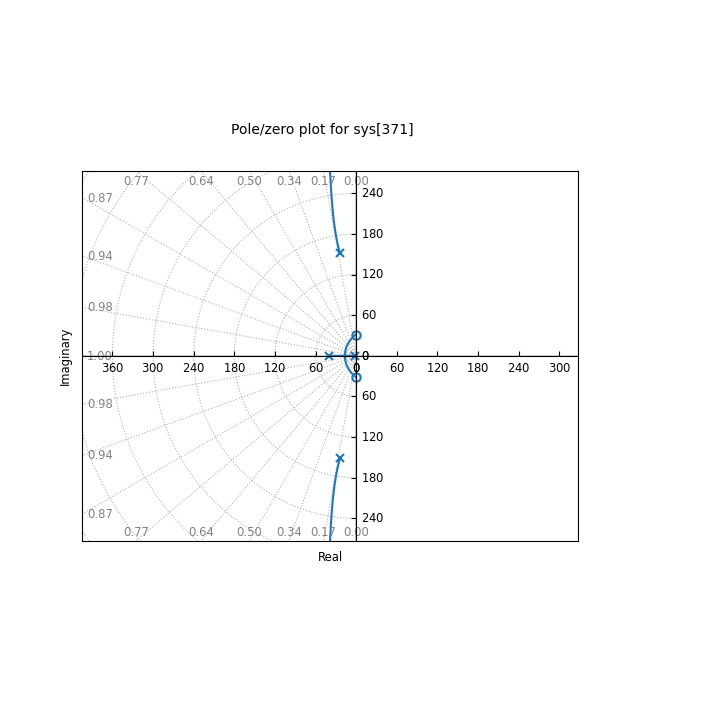

In [16]:
ct.root_locus(Gfs)